C:\Users\abdul\AppData\Local\Temp\ipykernel_17500\224571806.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"X:\DMV\datasets\data.csv", encoding='ISO-8859-1')


Dataset Preview:
  stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990

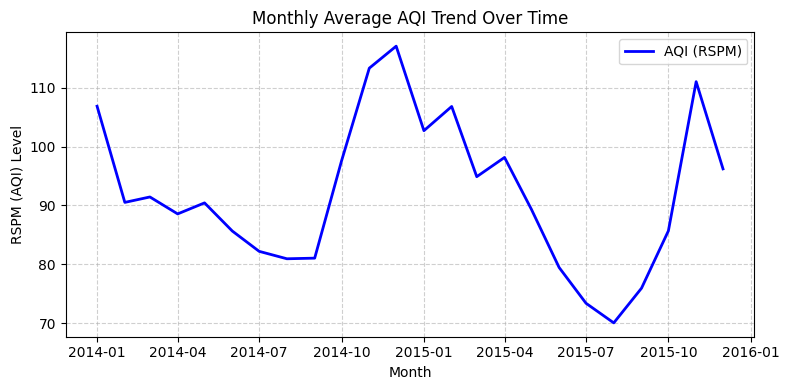

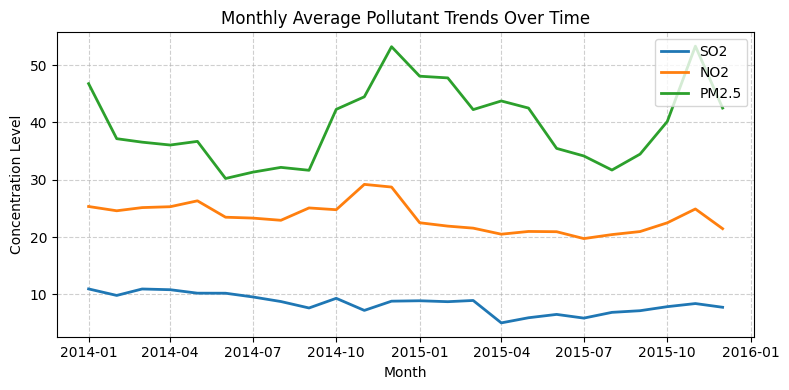

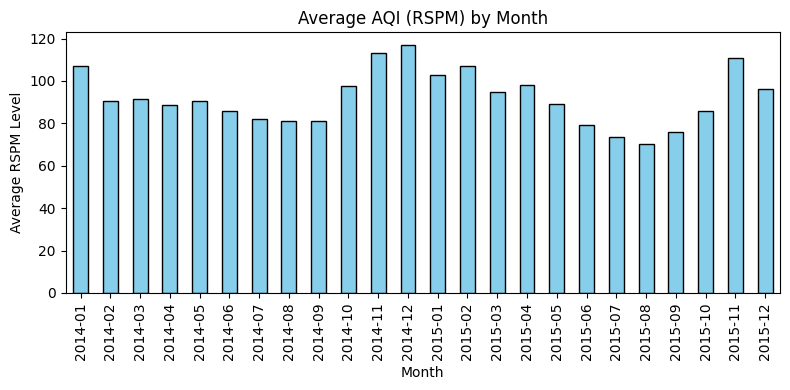

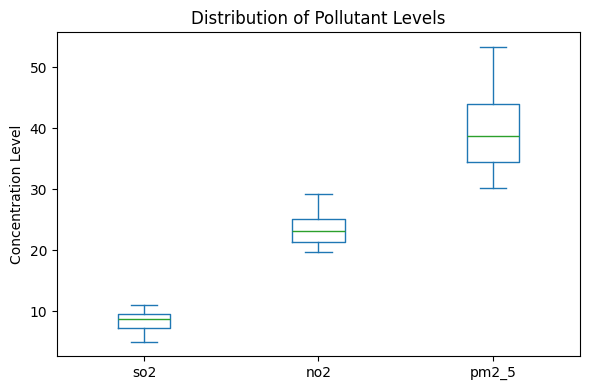

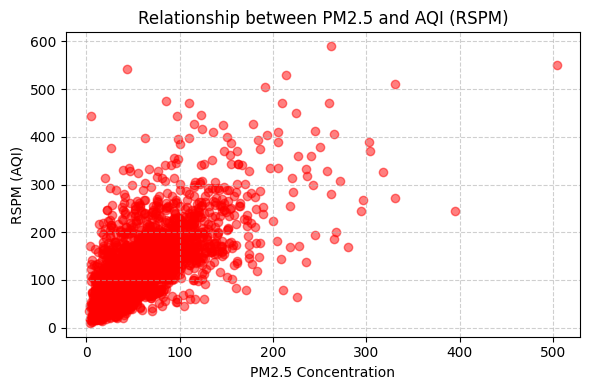

In [3]:
# Experiment 5: Data Visualization using Matplotlib
# Problem: Analyzing Air Quality Index (AQI) Trends in a City

import pandas as pd
import matplotlib.pyplot as plt

# 1. Import the dataset
df = pd.read_csv(r"X:\DMV\datasets\data.csv", encoding='ISO-8859-1')

# 2. Explore dataset
print("Dataset Preview:")
print(df.head())

# 3. Select relevant variables for AQI visualization
data = df[['date', 'so2', 'no2', 'rspm', 'pm2_5']].dropna()

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Remove invalid or missing dates
data = data.dropna(subset=['date'])

# 4. Aggregate by month to smooth the visualization
data['month'] = data['date'].dt.to_period('M')
monthly_data = data.groupby('month')[['so2', 'no2', 'rspm', 'pm2_5']].mean()

# --------------------------------------------------------------
# Visualization 1: Line plot for overall AQI trend (RSPM used as AQI indicator)
plt.figure(figsize=(8,4))
plt.plot(monthly_data.index.to_timestamp(), monthly_data['rspm'], color='blue', linewidth=2, label='AQI (RSPM)')
plt.title('Monthly Average AQI Trend Over Time')
plt.xlabel('Month')
plt.ylabel('RSPM (AQI) Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# Visualization 2: Line plots for individual pollutant trends
plt.figure(figsize=(8,4))
plt.plot(monthly_data.index.to_timestamp(), monthly_data['so2'], label='SO2', linewidth=2)
plt.plot(monthly_data.index.to_timestamp(), monthly_data['no2'], label='NO2', linewidth=2)
plt.plot(monthly_data.index.to_timestamp(), monthly_data['pm2_5'], label='PM2.5', linewidth=2)
plt.title('Monthly Average Pollutant Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Concentration Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# Visualization 3: Bar plot comparing average AQI (RSPM) by month
plt.figure(figsize=(8,4))
monthly_data['rspm'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average AQI (RSPM) by Month')
plt.xlabel('Month')
plt.ylabel('Average RSPM Level')
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# Visualization 4: Box plot for pollutant distribution
monthly_data[['so2', 'no2', 'pm2_5']].plot(kind='box', figsize=(6,4))
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Concentration Level')
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# Visualization 5: Scatter plot – Relationship between PM2.5 and AQI (RSPM)
plt.figure(figsize=(6,4))
plt.scatter(data['pm2_5'], data['rspm'], color='red', alpha=0.5)
plt.title('Relationship between PM2.5 and AQI (RSPM)')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('RSPM (AQI)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
